In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Interpolation:
    def bilinear(self, img, scale=1.5):
        H, W = img.shape[:2]
        ch = 1 if len(img.shape) < 3 else img.shape[2]
        H_big, W_big = int(H * scale), int(W * scale)
        output_img = np.zeros((H_big, W_big, ch))

        for i in range(H_big):
            for j in range(W_big):
                y, x = min(H-2, int(i/scale)), min(W-2, int(j/scale))
                dy, dx = i/scale - y, j/scale - x
                D = [(1-dy)*(1-dx), dy*(1-dx), (1-dy)*dx, dy*dx]
                if len(img.shape) == 3:
                    I = [img[y, x, :], img[y+1, x, :], img[y, x+1, :], img[y+1, x+1, :]]
                    output_img[i, j, :] = sum(d*z for (d, z) in zip(D, I))
                else:
                    I = [img[y, x], img[y+1, x], img[y, x+1], img[y+1, x+1]]
                    output_img[i, j] = sum(d*z for (d, z) in zip(D, I))

        # 仮に幅や高さが 1 になるような画像であると成立しないので注意
        output_img = np.squeeze(np.clip(output_img, 0, 255).astype("uint8"))
        return output_img

In [10]:
class Solver:
    def problem_73(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ip = Interpolation()
        output_img = ip.bilinear(img_gray, 0.5)
        output_img = ip.bilinear(output_img, 2.0)
        return output_img
    
    def problem_74(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.int32)
        img_ip = self.problem_73(img).astype(np.int32)
        img_diff = np.abs(img_gray - img_ip)
        img_diff = (img_diff / img_diff.max() * 255).astype(np.uint8)
        return img_diff
    
    def problem_75(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ip = Interpolation()
        
        images = []
        for i in range(6):
            scale = 1.0 / (2**i)
            scaled_image = ip.bilinear(img_gray, scale)
            images.append(scaled_image)
            text = "1/{}".format(2**i)
            plt.subplot(2, 3, i+1)
            plt.imshow(scaled_image, cmap="gray")
            plt.title(text)
        plt.show()
        return images

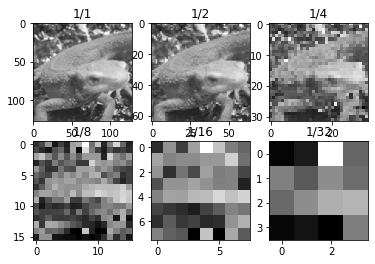

[array([[ 82,  56,  54, ..., 117,  88, 122],
        [ 89,  67,  58, ..., 142, 137, 109],
        [ 86,  80,  71, ..., 159, 179, 104],
        ...,
        [173,  98, 110, ...,  56,  58,  56],
        [198, 115, 118, ...,  79,  59,  57],
        [154, 130, 126, ..., 118,  96,  66]], dtype=uint8),
 array([[ 82,  54,  66, ...,  97, 126,  88],
        [ 86,  71,  56, ...,  94, 134, 179],
        [ 89, 116,  74, ...,  79,  80,  98],
        ...,
        [100, 115, 129, ...,  59,  59,  74],
        [138, 111, 135, ...,  51,  62,  58],
        [198, 118, 118, ...,  62,  86,  59]], dtype=uint8),
 array([[ 82,  66, 103, ..., 176,  72, 126],
        [ 89,  74,  77, ..., 251,  89,  80],
        [100,  96,  78, ...,  99,  79, 197],
        ...,
        [ 70, 118, 135, ..., 158, 166, 141],
        [ 68, 133, 162, ...,  60,  60, 198],
        [138, 135, 155, ..., 136,  51,  62]], dtype=uint8),
 array([[ 82, 103, 166,  62,  96,  70, 175, 184, 253, 137, 204,  76, 148,
         218, 128,  72],
       

In [11]:
input_img = cv2.imread("../imori.jpg")
solver = Solver()
solver.problem_75(input_img)